# 주요 도움이 되는 기능들

[쥬피터 노트북 단축키](http://kkokkilkon.tistory.com/151)

# Print 함수 연습

In [3]:
print("처음 환영합니다.")

welcome = "처음 환영합니다"
(one, two) = ("시작", "끝")
print(welcome + "    두번째     " + one + "   " + two)

처음 환영합니다.
처음 환영합니다    두번째     시작   끝


In [1]:
print("테스트")

테스트


# 패키지 로딩

[판다스(Pandas)](https://pandas.pydata.org/)를 로딩합니다. 링크도 걸수 있습니다.
**앞에 별표 두개를 넣으면 두껍게 표시할 수도 있습니다**

alt + 엔터하면 해당 cell을 실행시키는 겁니다.

In [4]:
import pandas as pd

In [1]:
# 현재 디렉토리가 무엇인지 알아내는 함수, import os 필수

import os
print (os.getcwd())

C:\Users\ahnbu


In [22]:
# ln 옆에 있는 숫자가 ctrl + enter 할 때마다 바뀌던데, 무슨 의미가 있는지? 
#  혹시 나중에 전체 실행하면 실행하는 순서를 의미하는지?

train = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")
test = pd.read_csv("data/titanic/test.csv", index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 시각화

In [10]:
# seaborn과 matpolotlib의 철자에 주의
# Q. 강의 자료에 "$matplotlib inline"이라고 되어 있던 것은 무엇인지?
# Q. 왜 matplotlib 라이브러리를 그대로 불러오지 않고, pyplot을 지정해서 불러왔는지?

import seaborn as sns
import matplotlib.pyplot as plt

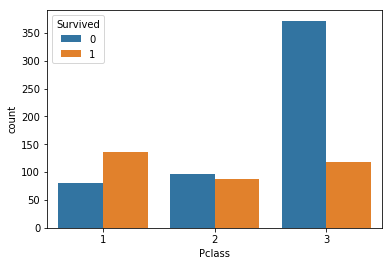

In [19]:
# hue는 빛깔, 색조, 유형의 의미가 있으며, 챠트에서는 축이 아니라, 값을 의미하는 것

sns.countplot(data = train, x = "Pclass", hue = "Survived")

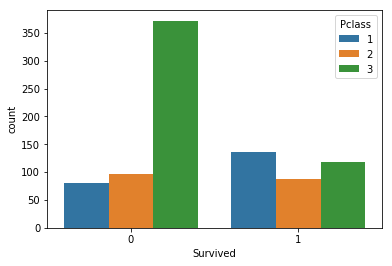

In [18]:
sns.countplot(data = train, x = "Survived", hue = "Pclass")

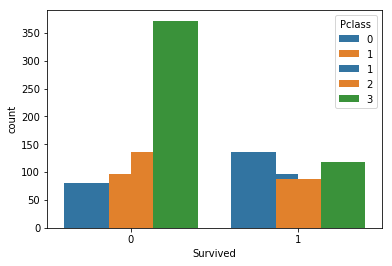

In [21]:
# Q. 2개 라인을 같이 쓰면, 왜 그래프가 찌그러지는지? 
#   내 생각에는 2개 그래프가 나와야 할 것 같은데...

sns.countplot(data = train, x = "Pclass", hue = "Survived")
sns.countplot(data = train, x = "Survived", hue = "Pclass")

In [32]:
# 여러개의 변수로 피벗 테이블 만들 수 있음.
# 그러나 Sex는 male, female로 되어 있기 때문에 피벗테이블 결과물로 나오지 않음
# 그렇다고 에러가 나오지도 않음

pd.pivot_table (train, index = "Survived", values = ["Sex", "Pclass", "Fare"])

,Fare,Pclass
Survived,,
0,22.117887,2.531876
1,48.395408,1.950292


In [39]:
# sns (Seaborn) .countplot (data = train, x = "Sex", hue = "Survived")
# sns (Seaborn) .lmplot (date = train, x = "Age", "Fare", hue = "Survived", fit_reg = "False")
# pd (Pandas) .pivot_table (train, index = "Sex", values = ["Pclass", "Survived"])
# pd (Pandas) .read_csv ("data/titanic/train.csv", index_col = "PassengerId")
# train = pd.read.csv

#### 테이블 처리
# test.loc [test["Sex"] == "male", "Sexencode"] = 0
### loc는 문자, iloc는 위치?,... 등 처리방법이 다름
### loc : 라벨값 기반의 2차원 인덱싱; iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱

# test.head()
# print (test.shape)
# print (os.getcwd())  ## 현재 디렉토리 확인하기




# 테이블을 변수에 담아두고, 처리하는 연습

In [36]:
pivot = pd.pivot_table (train, index = "Survived", values = ["Sex", "Pclass", "Fare"])

# Q. 왜 print를 아래에 두면 표가 안나올까? pivot.shape()의 결과물만 나오고..

print (pivot.shape)
pivot.head()


(2, 2)


,Fare,Pclass
Survived,,
0,22.117887,2.531876
1,48.395408,1.950292


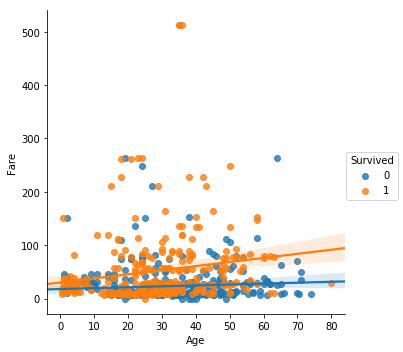

In [38]:
sns.lmplot (data = train, x = "Age", y = "Fare", hue = "Survived")

(157, 11)


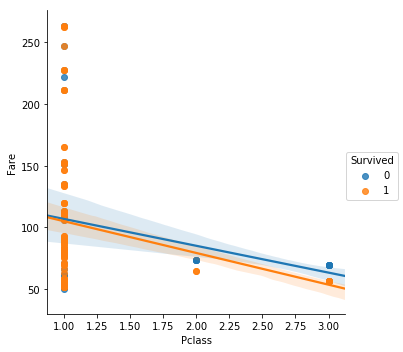

In [52]:
# 여러 개의 조건을 걸어주는 방식.. fare가 100보다 크고, 500보다 작은 것을 분석하는.
### Q. 그런데, 이것을 2줄이 아니라 1줄로 처리할 수 있는 방법은 없을지?
    
low_fare_train = train[train["Fare"] < 500]
low_fare_train2 = low_fare_train[low_fare_train["Fare"] > 50]
print (low_fare_train2.shape)
#low_fare_train2.head()
sns.lmplot (data = low_fare_train2, x = "Pclass", y = "Fare", hue = "Survived")

In [53]:
train.shape, test.shape, low_fare_train.shape, low_fare_train2.shape

((891, 11), (418, 10), (888, 11), (157, 11))

In [55]:
test.loc [test["Sex"] == "male", "Sex_encode"] = 0
test.loc [test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)
test.head()

(418, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


## 엑셀 pivot 분석할 때 사용했던 로직들

연령대 분류
sib분류
fare분류

ticket 길이재기
ticket 첫 3자만 따기

Parch유무

sib+parch 합산하여, 컬럼 만들기

Cabin 앞자만 따기 + 빈경우 비어있다고 표기하기
cabin c,g는 모아서 표기
embarked를 c와 c가 아닌 것으로 분류하여 살펴보기

# loc, iloc 차이.... 

[Pandas에서 row, column 선택방법](http://blogyong.tistory.com/6)


In [62]:
# Q. 왜 괄호[]를 1개 더 쳐야 하는지?

train2 = train[["Sex", "Survived"]]
print(train2.shape)
train2.head()

#train[["Sex", "Survived"]].head()

(891, 2)


,Sex,Survived
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0


In [66]:
# Q.괄호를 치면, 열이 1개 보이고, 
# 괄호를 치지 않으면 열개수가 없는 것으로 나오는 이유는?

train2 = test[["Sex"]]
print(train2.shape)
train2.head()


(418, 1)


,Sex
PassengerId,
892,male
893,female
894,male
895,male
896,female


In [85]:
# test[test["Sex"] == male]
# Q. 테이블 내에 비어있는 곳을 찾으려면?

#test[test["Fare"].isnull()]
#test[test[:].isnull()]

train ["Fare_filling"] = train ["Fare"]
train.loc [train["Fare"].isnull(), "Fare_filling"] = train["Fare"].mean()
print(train.shape)
train.head()


(891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_filling
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


In [92]:
test ["Fare_filling"] = test ["Fare"]
test.loc [test["Fare"].isnull(), "Fare_filling"] = test["Fare"].mean()

# 소수점자리수 2자리로 제한. 
# Q. 근데 소수점 없이 하거나,반올림은 어떻게 할 수 있을지?

print(round(test["Fare"].mean(),2))
print(test.shape)
test.head()

35.6272
(418, 12)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_filling
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,12.2875


In [101]:
test2 = test["Name"].[0]
test2.head()

SyntaxError: invalid syntax (<ipython-input-101-34d544941d3a>, line 1)

In [102]:
help(countplot())

NameError: name 'countplot' is not defined

In [103]:
help(countplot)

NameError: name 'countplot' is not defined

In [104]:
help(pandas)

NameError: name 'pandas' is not defined

In [105]:
help(pivot)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ra